## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную по ссылке https://drive.google.com/file/d/1_2H5SJGM2TmBCs3b95aXHIH6R8ANd4ug/view?usp=sharing фотографию.

https://colab.research.google.com/drive/1dgLFXj4_kBad-IFfMkfRVdFEO6lGtQtl#scrollTo=tHYLc7KL6AKp&uniqifier=1 

In [121]:
import numpy as np
from skimage.io import imread
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
url = 'https://drive.google.com/uc?id=1QtqqFjj0bX0H0thJ-V8VsZvOWS-1-cPM'
img = imread(url)
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Mounted at /content/drive


In [122]:
import gdown # google download -- публичные файлы с Google Drive по ссылке
file_url = 'https://drive.google.com/uc?id=1QtqqFjj0bX0H0thJ-V8VsZvOWS-1-cPM'
filepath = '/content/sample_data/chain_small.jpg'
gdown.download(file_url, filepath, quiet=True)

'/content/sample_data/chain_small.jpg'

Нарисуйте картинку:

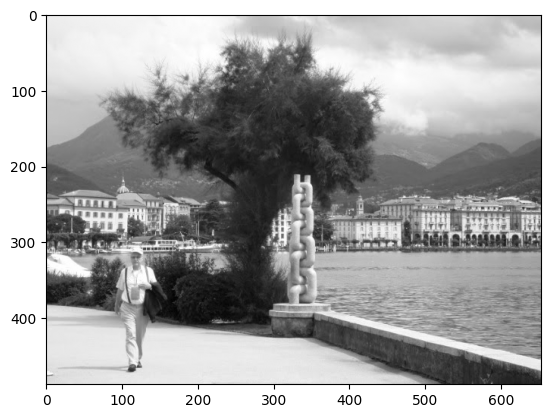

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [124]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

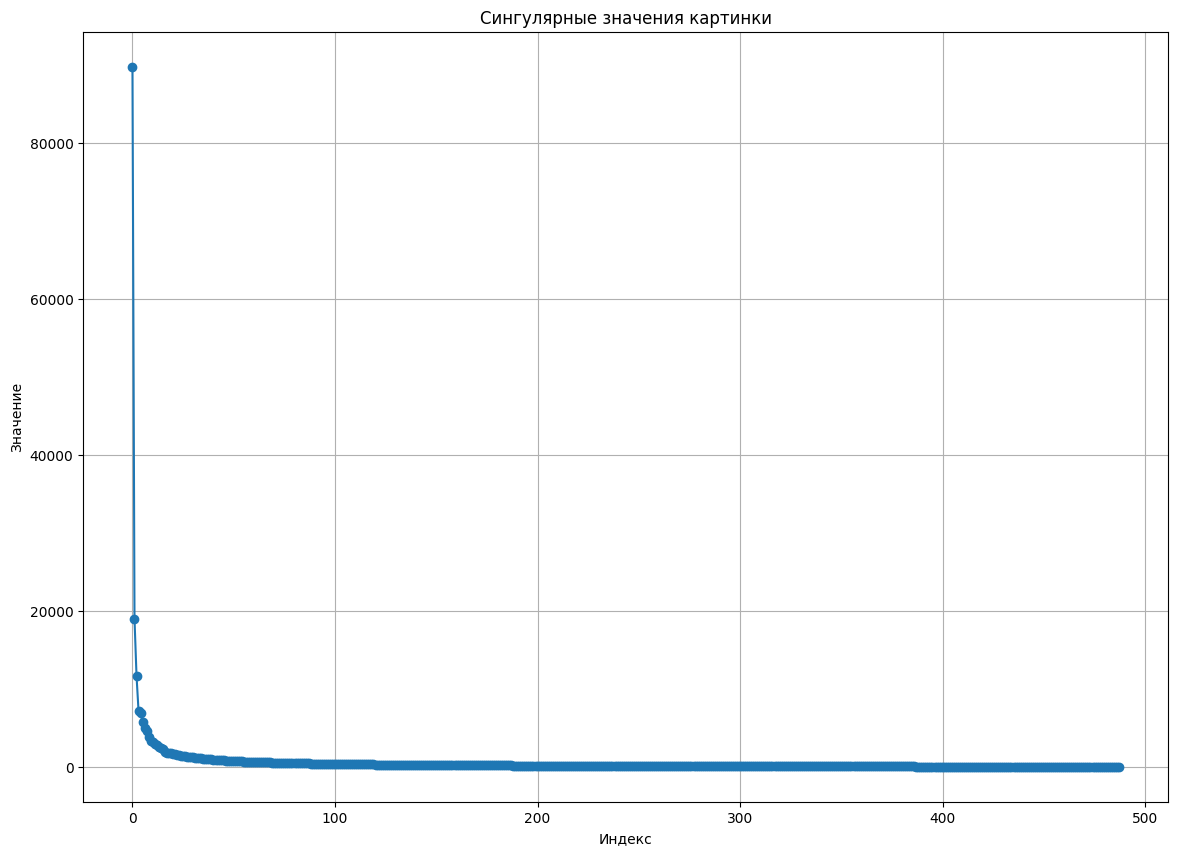

In [125]:
plt.figure(figsize=(14, 10))
plt.plot(S, marker='o')
plt.title("Сингулярные значения картинки")
plt.xlabel("Индекс")
plt.ylabel("Значение")
plt.grid(True)
plt.show()  #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.3 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

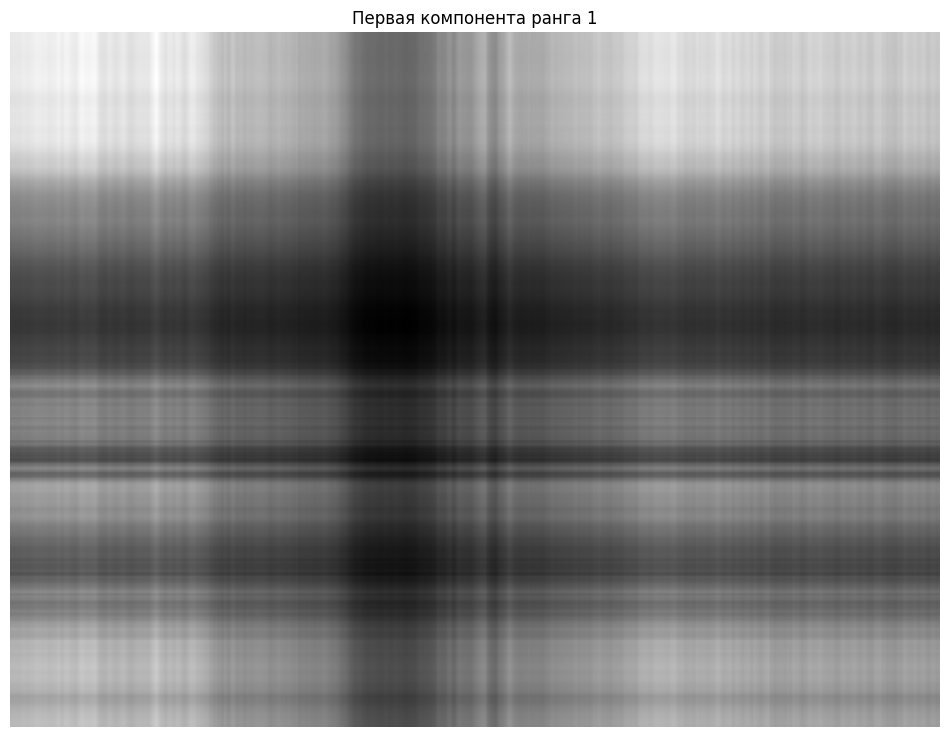

In [126]:
component_rank_1 = S[0] * np.outer(U[:, 0], VT[0, :])
plt.figure(figsize=(12,10))
plt.imshow(component_rank_1, cmap='gray')
plt.title("Первая компонента ранга 1")
plt.axis('off')
plt.show()  #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

##      Первая компонента ранга 1 дает информацию об изображении, связанную с изменениями в яркости и структуре картинки. Первая компонента ранга 1 охватывает наибольшую и самую важную долю информации о картинке. Визуализация, действительно, отображает цветовую гамму и структуру картинки.


**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

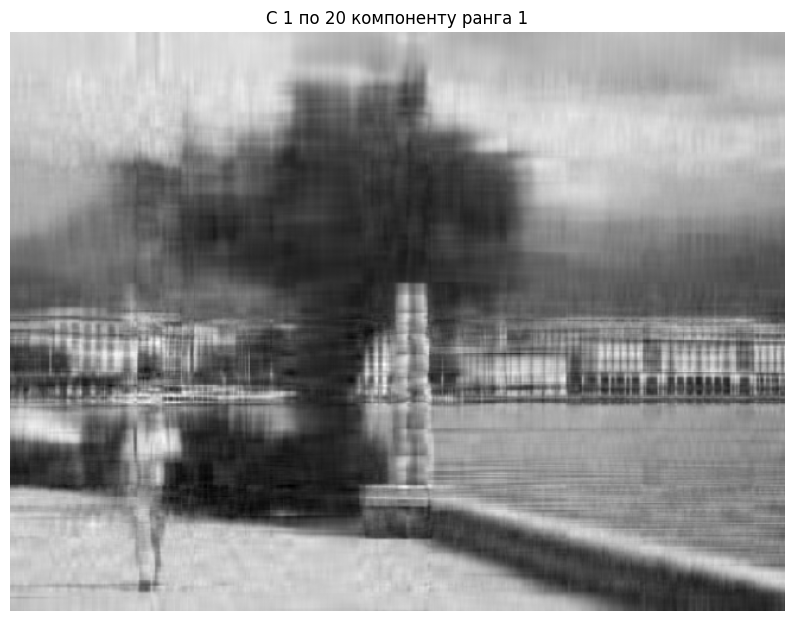

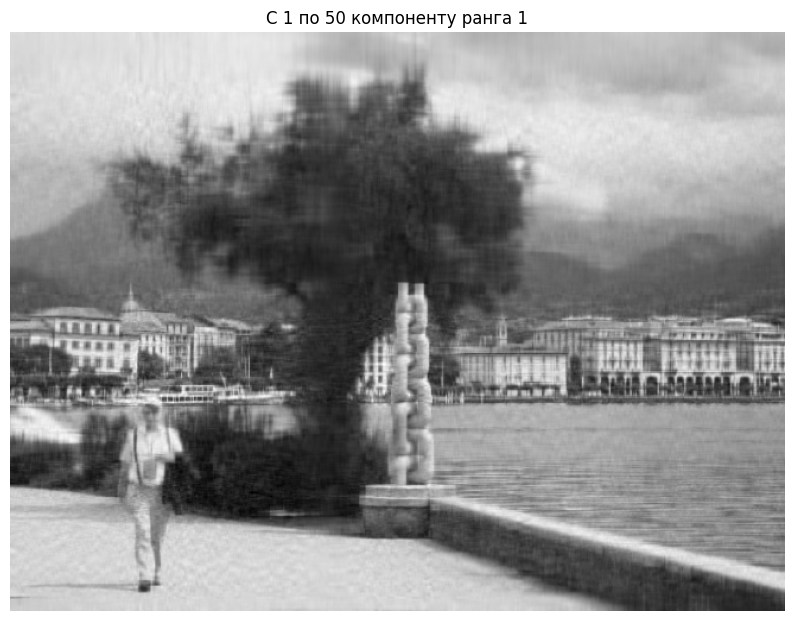

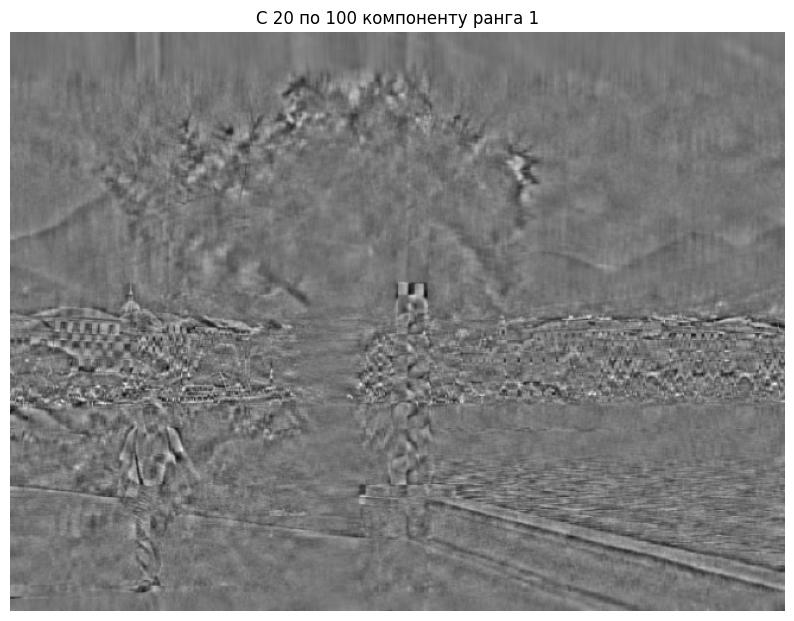

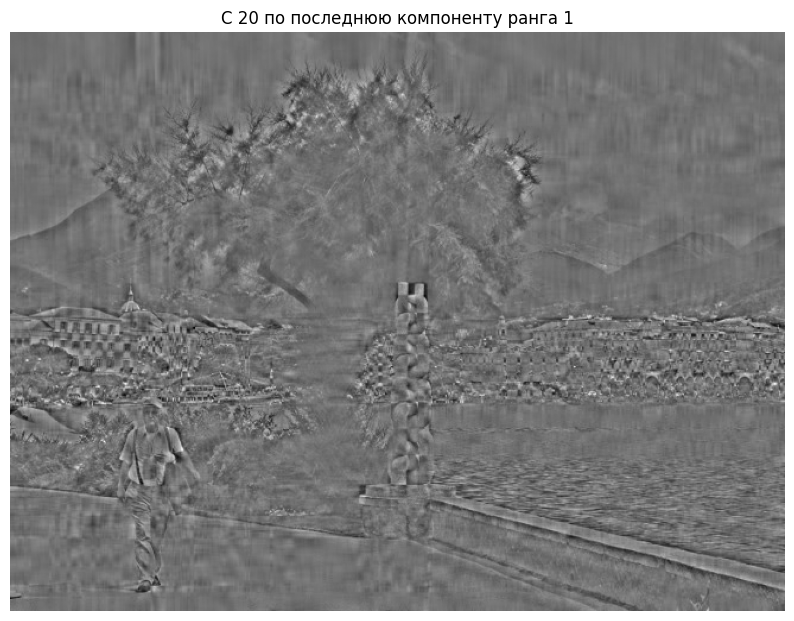

In [127]:
def component_svd(U, S, VT, start, end):
    S_filtered = S[start:end]
    U_filtered = U[:, start:end]
    VT_filtered = VT[start:end, :]
    return U_filtered @ np.diag(S_filtered) @ VT_filtered
component_1_to_20 = component_svd(U, S, VT, 0, 20)
plt.figure(figsize=(10, 10))
plt.imshow(component_1_to_20, cmap='gray')
plt.title("С 1 по 20 компоненту ранга 1")
plt.axis('off')
plt.show()

component_1_to_50 = component_svd(U, S, VT, 0, 50)
plt.figure(figsize=(10, 10))
plt.imshow(component_1_to_50, cmap='gray')
plt.title("С 1 по 50 компоненту ранга 1")
plt.axis('off')
plt.show()

component_20_to_100 = component_svd(U, S, VT, 20, 100)
plt.figure(figsize=(10, 10))
plt.imshow(component_20_to_100, cmap='gray')
plt.title("С 20 по 100 компоненту ранга 1")
plt.axis('off')
plt.show()

component_20_to_the_last = component_svd(U, S, VT, 20, len(S))
plt.figure(figsize=(10, 10))
plt.imshow(component_20_to_the_last, cmap='gray')
plt.title("С 20 по последнюю компоненту ранга 1")
plt.axis('off')
plt.show()

**4. [0.5 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задание постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Для определения компонент для достаточно хорошего восстановления исходного изображения необходимо учесть, что значимость компонент по мере увеличения индекса компоненты снижается, а  это значит, что компоненты с высоким индексом не несут большой значимости и стоит обратить внимание в первую очередь на копоненты с низким индексом. (большая часть важной информации сосредоточена в первых компонентах, они описывают общую структуру изображения, а компоненты с высоким индексом отображают мелкие детали картинки). Исходя из уже сделанных визуализации можно отметить, что визуализация с 1 по 50 копоненту дает достаточно приемлемое качество картинки.

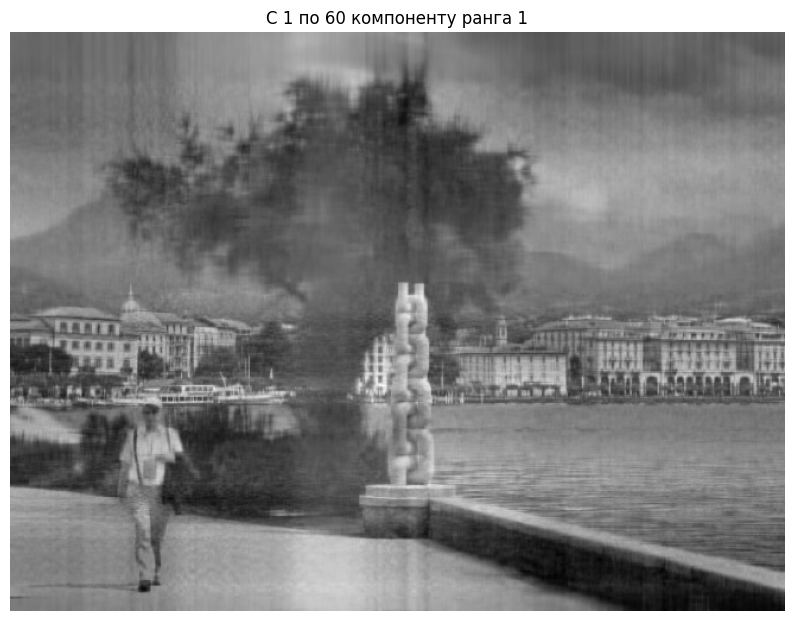

In [128]:
component_1_to_60 = component_svd(U, S, VT, 1, 60)
plt.figure(figsize=(10, 10))
plt.imshow(component_1_to_60, cmap='gray')
plt.title("С 1 по 60 компоненту ранга 1")
plt.axis('off')
plt.show()
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**5. [0.35 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

Если исходная картинка имеет размеры 1000 * 1000, она займет память 1000000. Сингулярное разложение картинки: матрица U: 1000⋅(сумма компонент) + матрица S: (сумма компонент) + матрица VT: (сумма компонент)⋅1000. Найдем отношение объемов памяти: (1000 * 60(из предыдущего задания)+60+60 * 1000)/1000000 = 0.12006. Потребуется примерно в 12 раз меньше памяти.

In [129]:
img.shape

(488, 653)

In [155]:
#затраты памяти составят mr+nr+r=r(m+n+1)
memory_first = 488*653
print("Исходное изображение в памяти:", memory_first)
memory_svd = 60*(488+653+1)
print("Общая память для SVD в памяти:", memory_svd)
print("Отношение веса  SVD к весу исходной картинки в памяти:", memory_svd/memory_first)

Исходное изображение в памяти: 318664
Общая память для SVD в памяти: 68520
Отношение веса  SVD к весу исходной картинки в памяти: 0.21502271985539628


Матрица SVD занимает в памяти примерно в 21 раз меньше матрицы исходной картинки.

**6. [0.35 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

реальные размеры картинки 488 * 653 пикселей, вес картинки в памяти в байтах:

In [131]:
img_first = img
print("Исходное изображение в памяти в байтах:", img_first.nbytes)
U_new = U[:,:60]
print("Матрица U в памяти в байтах:", U_new.nbytes)
S_new= S[:60]
print("Матрица S в памяти в байтах:", S_new.nbytes)
VT_new = VT[:60,:]
print("Матрица VT в памяти в байтах:", VT_new.nbytes)
total_svd_in_memory = U_new.nbytes + S_new.nbytes + VT_new.nbytes
print("Общая память для SVD в памяти в байтах:", total_svd_in_memory)
print("Отношение веса  SVD к весу исходной картинки в памяти:", total_svd_in_memory/img_first.nbytes)

Исходное изображение в памяти в байтах: 2549312
Матрица U в памяти в байтах: 234240
Матрица S в памяти в байтах: 480
Матрица VT в памяти в байтах: 313440
Общая память для SVD в памяти в байтах: 548160
Отношение веса  SVD к весу исходной картинки в памяти: 0.21502271985539628


Согласуется с результатами предыдущего пункта, SVD-разложение занимает меньше памяти, чем исходная картинка, это связано с тем, что при хранении разложения  хранятся усеченные матрицы (ограничение ранга матрицы). За счет ограничения ранга хранится наиболее важная информация, без мельчайших деталей картинки.

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ (специальная мера разброса) максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


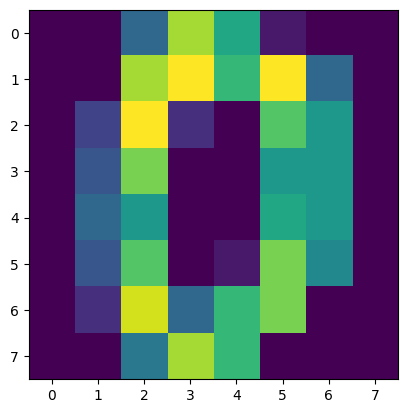

In [132]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [157]:
U, S, VT =  np.linalg.svd(digits.data, full_matrices=False)
print("U:", U.shape)
print("S:", S.shape)
print("Vt:", VT.shape)
U, S, VT

U: (1797, 64)
S: (64,)
Vt: (64, 64)


(array([[ 2.09114372e-02, -2.10250887e-03,  3.89296445e-02, ...,
          0.00000000e+00,  0.00000000e+00, -9.92354046e-01],
        [ 2.53199533e-02,  1.38656341e-02, -3.77989154e-02, ...,
         -3.29523349e-02,  4.54022664e-02, -2.89891431e-03],
        [ 2.54559261e-02,  1.21951237e-02, -1.78272413e-02, ...,
          4.81959992e-04,  1.91190721e-02, -2.06422290e-03],
        ...,
        [ 2.98784403e-02,  1.87985701e-02, -1.16134751e-02, ...,
         -5.43417478e-03,  1.79937098e-03, -1.02884326e-03],
        [ 2.67227437e-02, -8.66186959e-03,  2.34742370e-02, ...,
         -1.17167268e-03, -1.40385595e-03,  3.65007231e-03],
        [ 2.93865591e-02, -8.03379300e-04,  1.29922129e-02, ...,
          1.55423521e-04,  3.64266134e-03, -4.73044250e-03]]),
 array([2.19311934e+03, 5.66996772e+02, 5.42004933e+02, 5.04151698e+02,
        4.25592965e+02, 3.53218247e+02, 3.20375836e+02, 3.02074410e+02,
        2.79556965e+02, 2.68519447e+02, 2.28655772e+02, 2.24164792e+02,
        2.075

**6. [1 балл]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

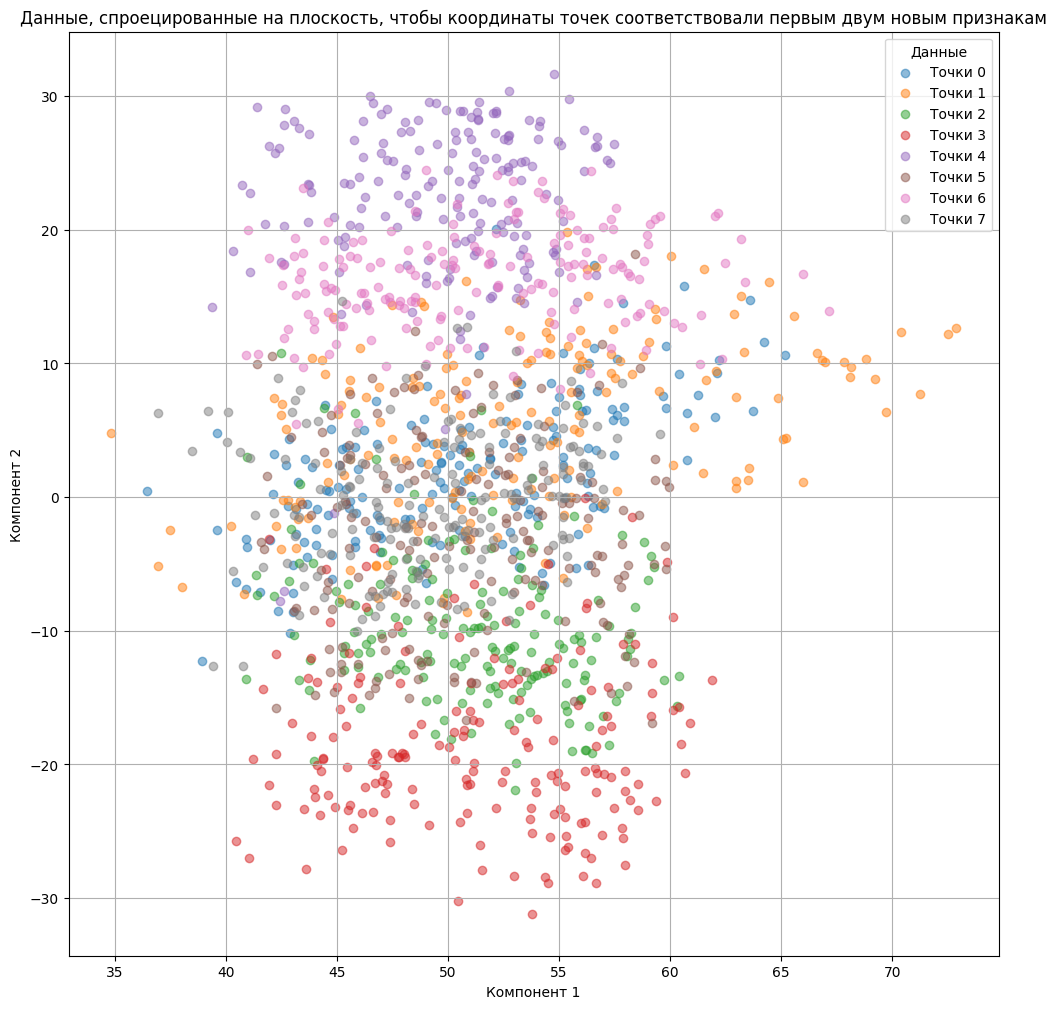

In [159]:
new_data = U[:, :2] * S[:2]
plt.figure(figsize=(12, 12))
colors = plt.cm.tab10(np.arange(8))
for i in range(8):
    indices = digits.target == i
    plt.scatter(new_data[indices, 0], new_data[indices, 1], color=colors[i], label=f'Точки {i}', alpha=0.5)
plt.title("Данные, спроецированные на плоскость, чтобы координаты точек соответствовали первым двум новым признакам")
plt.xlabel("Компонент 1")
plt.ylabel("Компонент 2")
plt.legend(title="Данные", loc='best')
plt.grid(True)
plt.show()#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**7. [0.5 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

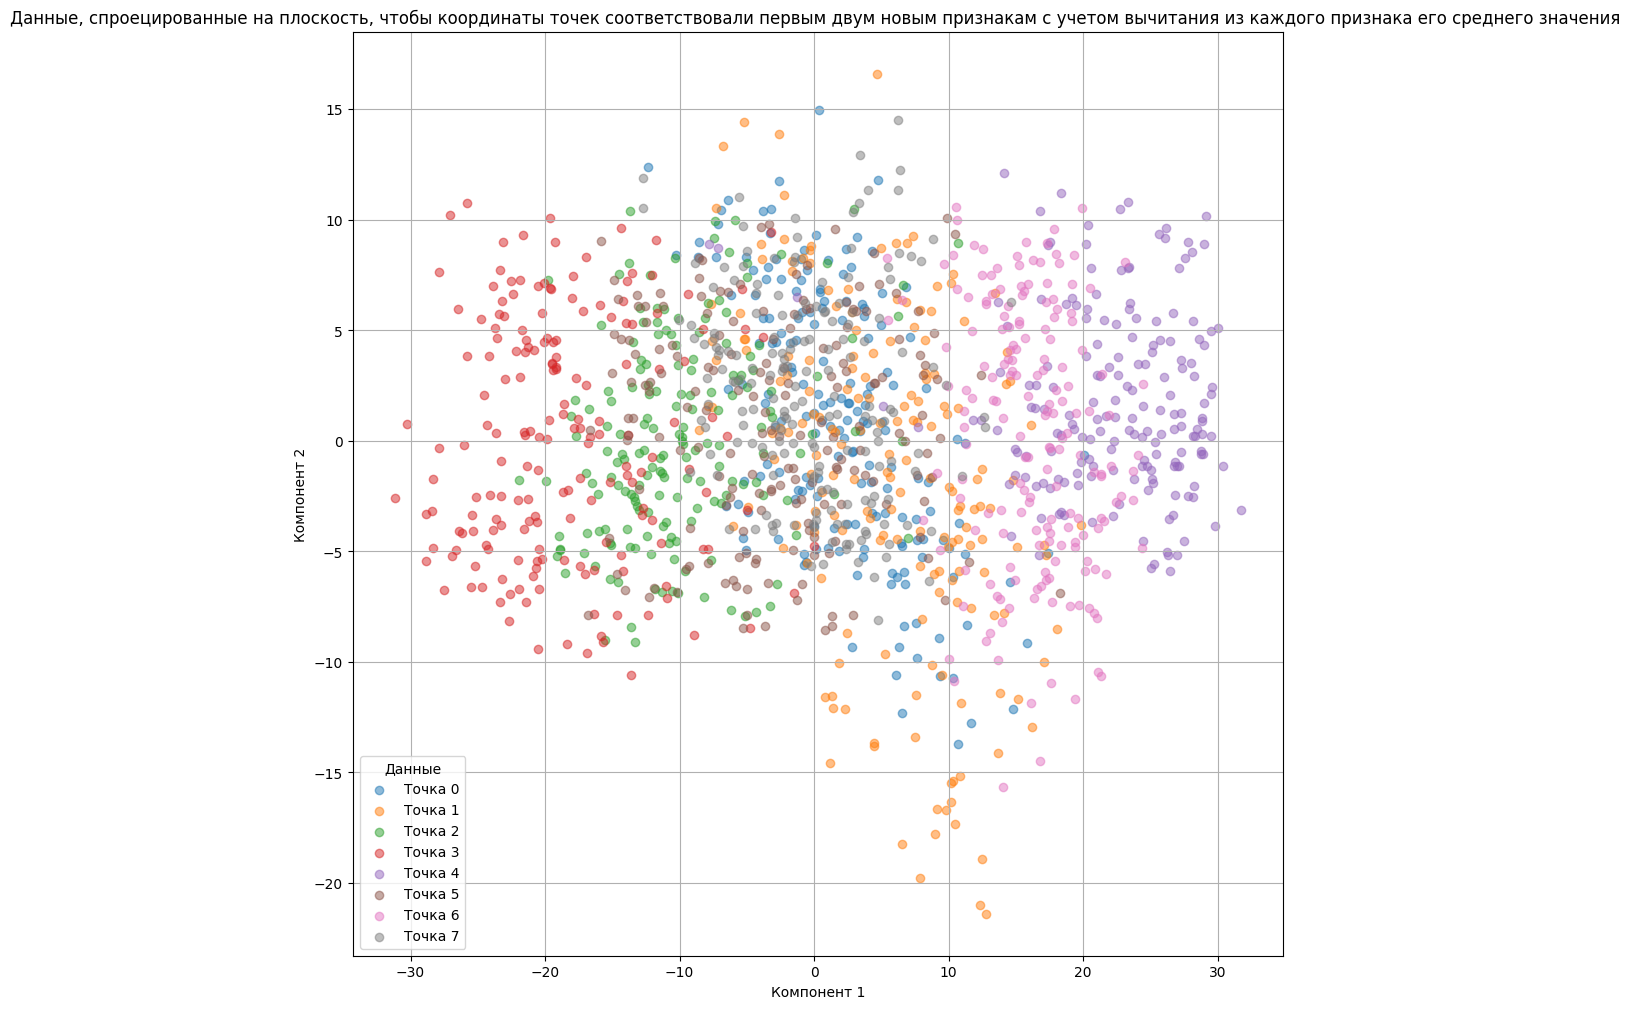

In [168]:
data_minus_average = new_data - np.mean(new_data, axis=0)
U_minus_average, S_minus_average, VT_minus_average = np.linalg.svd(data_minus_average, full_matrices=False)
new_data = U_minus_average[:, :2] * S_minus_average[:2]
colors = plt.cm.tab10(np.arange(8))
plt.figure(figsize=(12, 12))
for i in range(8):
    indices = digits.target == i
    plt.scatter(new_data[indices, 0], new_data[indices, 1],color=colors[i], label=f'Точка {i}', alpha=0.5)
plt.title("Данные, спроецированные на плоскость, чтобы координаты точек соответствовали первым двум новым признакам с учетом вычитания из каждого признака его среднего значения ")
plt.xlabel("Компонент 1")
plt.ylabel("Компонент 2")
plt.legend(title="Данные", loc='best')
plt.grid(True)
plt.show()

**8. [0.5 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

Вычитание из каждого признака его среднего значения повлияло на направление главных компонент, так как в первоначальной визуализации компоненты смещены под влиянием среднего значения. Вычитание средних значений сделало качество проекции лучше, так как главные компоненты теперь отражают лучше варьируемость данных, не искажаясь из-за средних значений. Проекция данных стала более точной, что дает возможность правильнее проанализировать данные.

### Задание 3. Поиск похожих изображений с помощью SVD.

В этой задаче мы познакомимся с одним из возможных приложений сингулярного разложения — поиск "хорошего" базиса (eigenfaces) в наборе изображений и использования его для поиска похожих изображений.

**Замечание:** пользоваться циклами по изображениям **запрещено**, если это явно не прописано в условии.

Для этого сначала загрузим набор изображений, на котором будем обучаться. Это набор фотографий лиц, взятый с [сайта](http://vis-www.cs.umass.edu/lfw/) проекта "Labeled faces in the wild". Скачайте лица людей с именами, начинающимися на "А" и положите в папку `data/` в рабочей директории ноутбука.

Импортируем необходимые библиотеки и загрузим картинки в виде numpy-массивов.

In [136]:
import matplotlib.pyplot as plt
import PIL
import tarfile
import os
import numpy as np
from google.colab import drive
import gdown

def load_images(targz, size):
    images = {}
    tar = tarfile.open(targz, "r:gz")
    for tarinfo in tar:
        if tarinfo.isreg():
            file = tar.extractfile(tarinfo)
            image = PIL.Image.open(file)
            image = image.convert("L")
            image = image.resize(size, PIL.Image.LANCZOS)
            image = np.asarray(image, dtype=np.double)
            image /= np.linalg.norm(image)
            parts = os.path.normpath(tarinfo.name).split(os.path.sep)
            images.setdefault(parts[-2], []).append(image)
    return images

In [137]:
drive.mount('/content/drive', force_remount=True)
url_new = 'https://drive.google.com/file/d/1R9hQAyQfYXZiTwl3JwMa8OdCSIFaN1dA/view?usp=drive_link'
gdown.download(url_new, quiet=True)


Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1R9hQAyQfYXZiTwl3JwMa8OdCSIFaN1dA
  warnings.warn(


'view?usp=drive_link'

In [138]:
file_id = "1s0CV95aXYAHvtTcVdF6SexfJU48DYA1R"
path = "/content/sample_data/lfw-a.tgz"
gdown.download(f"https://drive.google.com/uc?id={file_id}", path, quiet=False)
size = (256, 256)
images = load_images(path, size)

Downloading...
From: https://drive.google.com/uc?id=1s0CV95aXYAHvtTcVdF6SexfJU48DYA1R
To: /content/sample_data/lfw-a.tgz
100%|██████████| 14.5M/14.5M [00:00<00:00, 109MB/s] 


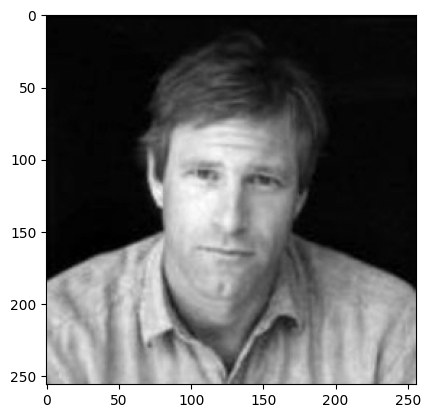

In [139]:
_ = plt.imshow(images["Aaron_Eckhart"][0], cmap="gray")

Сразу отложим одно изображение для последующего поиска.

In [140]:
test_image = images["Alejandro_Toledo"][10]
del images["Alejandro_Toledo"][10]

#### a. Применение базового алгоритма SVD

1. **(0.5 балла)** С помощью функции ```np.reshape(...)``` получите из словаря `images` массив ```M``` размера ```(size * size, nframes)```, каждым столбцом которого является изображение размера ```(size, size)```, представленное в виде вектора длины ```size**2``` (используйте такое значение параметра `order`, чтобы обходить картинки по столбцам).

*В этом пункте (и только в этом) можно использовать цикл по изображениям.*

In [169]:
def images_in_matrix(images, size):
    total_images = []
    for i in images.values():
        total_images.extend(i)
    M = np.column_stack([img.reshape(size**2, order='F') for img in total_images])
    return M
size = 256
M = images_in_matrix(images, size)
M

array([[0.        , 0.00830756, 0.00757426, ..., 0.0039546 , 0.00665002,
        0.00521268],
       [0.        , 0.00851439, 0.00757426, ..., 0.00443761, 0.00665002,
        0.00521268],
       [0.        , 0.00854886, 0.00757426, ..., 0.00476968, 0.00665002,
        0.00521268],
       ...,
       [0.00640797, 0.00165462, 0.0051493 , ..., 0.00172071, 0.00404217,
        0.        ],
       [0.00670701, 0.00148226, 0.00517924, ..., 0.00175089, 0.0038857 ,
        0.        ],
       [0.00687789, 0.00137885, 0.00517924, ..., 0.00178108, 0.00375531,
        0.        ]])

2. **(0.6 баллов)** Вычислите сингулярное разложение матрицы ```M``` с помощью ```np.linalg.svd``` и постройте график сингулярных чисел, отсортированных по убыванию. Шкала с сингулярными числами должна быть логарифмической. Например, для этого можно использовать функцию ```plt.semilogy```.

    **Замечание:** При построении графиков величин с отличающимися на порядки значениями полезно использовать логарифмическую шкалу. Чтобы убедиться в этом, попробуйте построить график не в логарифмической шкале; из него будет фактически невозможно понять характер убывания сингулярных чисел.

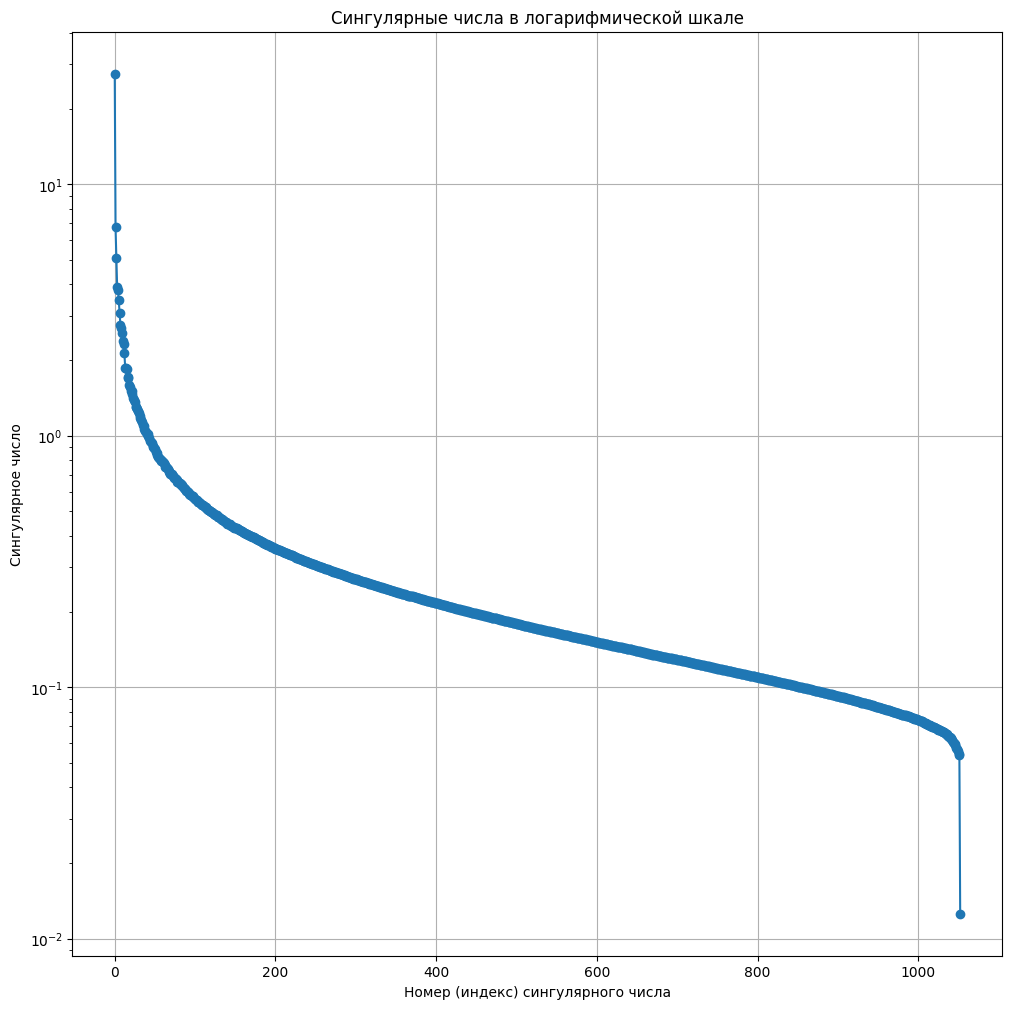

In [173]:
U, S, VT = np.linalg.svd(M, full_matrices=False)
plt.figure(figsize=(12, 12))
plt.semilogy(S, marker='o')
plt.title('Сингулярные числа в логарифмической шкале')
plt.xlabel('Номер (индекс) сингулярного числа')
plt.ylabel('Cингулярное число')
plt.grid(True)
plt.show()

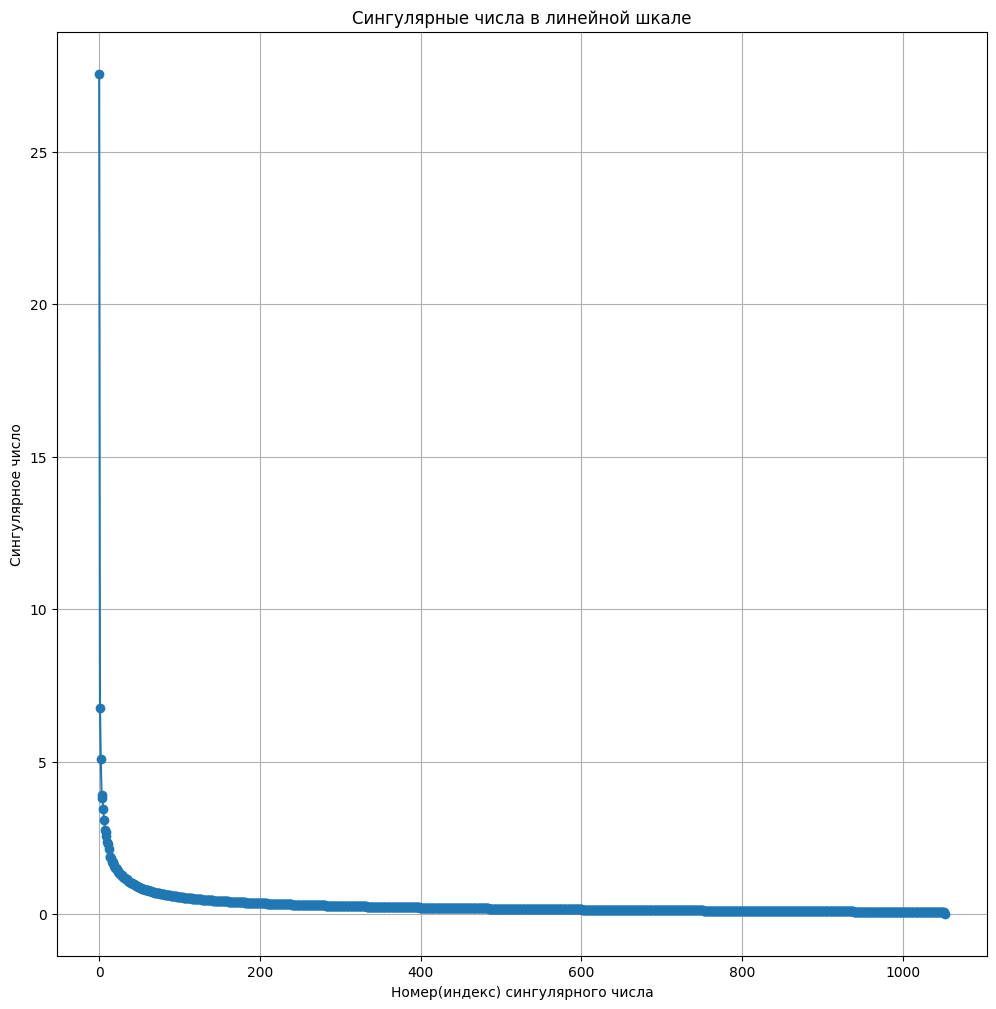

In [174]:
plt.figure(figsize=(12, 12))
plt.plot(S, marker='o')
plt.title('Сингулярные числа в линейной шкале')
plt.xlabel('Номер(индекс) сингулярного числа')
plt.ylabel('Сингулярное число')
plt.grid(True)
plt.show()

 3. **(0.5 баллов)** Заполните пропуск в следующей функции, которая должна визуализировать вектор-столбцы нашей матрицы в виде таблицы. Затем с её помощью визуализируйте несколько первых сингулярных векторов. Опишите неформально, за что отвечают три старших сингулярных вектора.

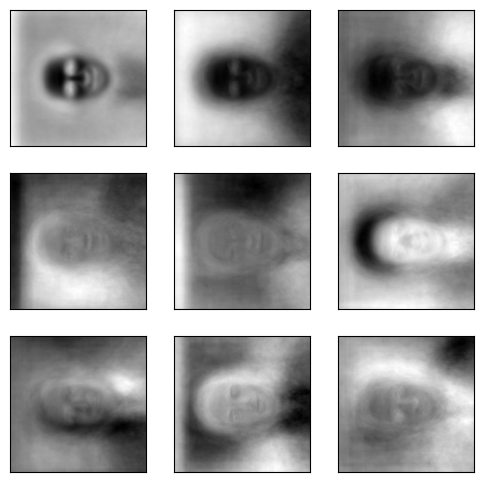

In [144]:
def plot_as_images(mat, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2,rows*2))
    for i in range(rows):
        for j in range(cols):
            axes[i,j].imshow(mat[:,i*cols + j].reshape(size, size), cmap="gray")
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)

plt.show()
plot_as_images(U[:, :9], rows=3, cols=3)

Первые несколько сингулярных векторов отвечают за основную информацию о данных, отображают структуру изображений (крупные детали), цветовую гамму.
Три старших сингулярных вектора важны, потому что они показывают наиболее важные и заметные изменения в данных (изменение черт и контура лица).

4. **(0.6 балла)** Напишите функцию-обёртку ```trunc_svd(M, r)```, которая повторяет вычисление svd из пункта 2, а потом вычисляет для матрицы $M$ оптимальное приближение $M_{r}$ заданного ранга. Функция должна возвращать матрицы $U$ и $C$ такие, что столбцы матрицы $U$ составляют ортонормированный базис столбцов $M_{r}$, а $UC = M_{r}$. Также функция `trunc_svd` возвращает **относительную** точность приближения во Фробениусовой норме, т.е.
$$
    \frac{\|M - M_{r}\|_F}{\|M\|_F}.
$$

In [175]:
def trunc_svd(M, r):
  U, S, VT = np.linalg.svd(M, full_matrices=False)
  S_fr = S[:r]
  U_fr = U[:, :r]
  VT_fr = VT[:r, :]
  U = U_fr
  Mr = U_fr @ np.diag(S_fr) @ VT_fr
  C = np.diag(S_fr) @ VT_fr
  eps = np.linalg.norm(M - Mr,  ord='fro')/np.linalg.norm(M,  ord='fro')

  return U, C, eps

  '''
        Input
            M: original 2D numpy array
            r: rank value for truncation

        Output
            U: orthonormal basis of columns of Mr
            C: coefficients in equality Mr = UC
            rel_eps: relative error of rank-r approximation Mr
    '''
  raise NotImplementedError()

5. **(0.6 баллов)** Проверим работу написанной функции. Для этого воспользуемся функцией, которая рисует исходное изображение, приближение некоторого ранга, а также первые `count` сингулярных векторов в разложении вместе с их коэффициентами. Заполните пропуски в ней с помощью метода `reshape`.

In [176]:
def plot_as_combination(M, U, C, count, indices):
    '''
        Input
            M: original 2D numpy array
            U: orthonormal basis of columns of Mr
            C: coefficients in equality Mr = UC
            count: desired number of images of singular vectors
            indices: indices of columns of M which are visualized
    '''

    fig, all_axes = plt.subplots(len(indices), count + 2, figsize=(count * 2, len(indices)*2))

    for i, index in enumerate(indices):
        axes = all_axes[i, :]

        axes[0].imshow(M[:, index].reshape(size, size), cmap="gray") # Original image
        axes[0].set_xlabel("Orig")

        appr = U @ C[:, index]
        axes[1].imshow(appr.reshape(size, size), cmap="gray") # Approximation image
        axes[1].set_xlabel("Appr")

        for j in range(count):
            axes[2 + j].imshow(U[:, j].reshape(size, size), cmap="gray") # i-th singular vector image
            axes[2 + j].set_xlabel("{:.7}".format(C[j, index]))

        for ax in axes:
            ax.set_xticks([])
            ax.get_yaxis().set_visible(False)

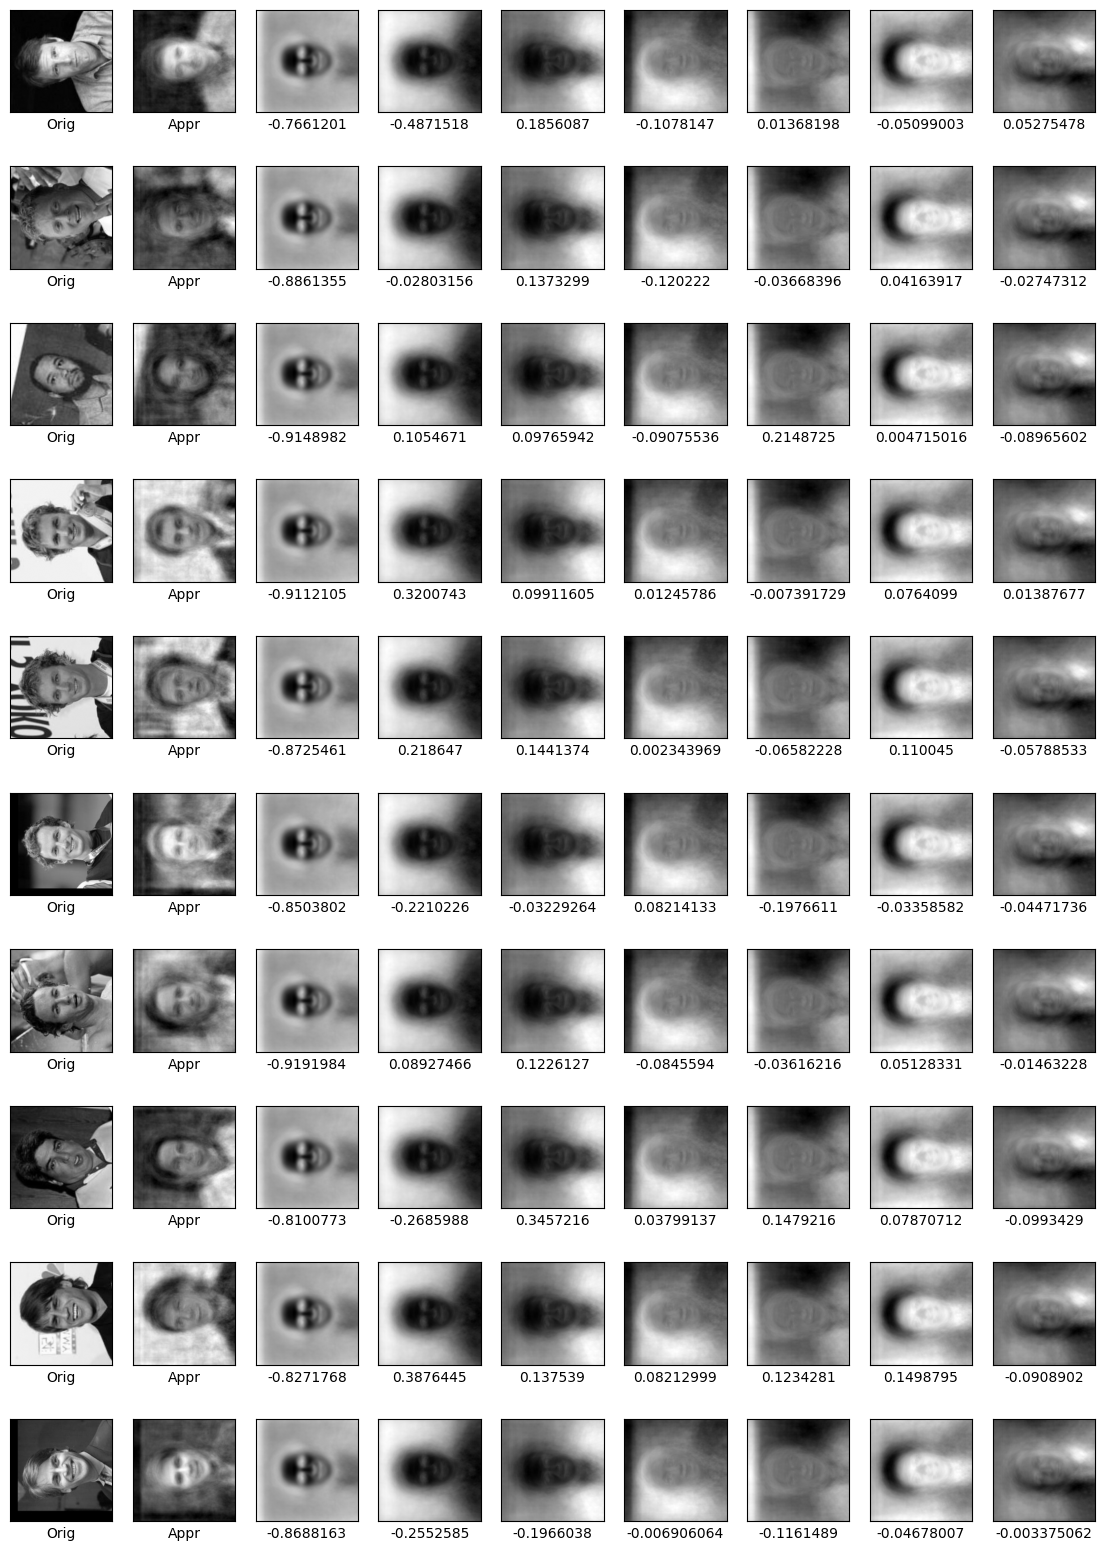

In [177]:
U, C, eps = trunc_svd(M, 100)
plot_as_combination(M, U, C, 7, range(10))

#### b. Поиск нового изображения

Представьте, что нам выдали новое изображение `new`, которого в нашей базе нет. Чтобы найти в базе похожие, можно посчитать норму разности с каждым имеющимся изображением. Для проверки напишем вспомогательную функцию, которая будет показывать подписанные картинки.

In [148]:
def show_images(M, indices, names):
    fig, axes = plt.subplots(1, len(indices), figsize=(len(indices)*3, 3))
    for ax, index in zip(axes, indices):
        ax.imshow(M[:,index].reshape((size, size), order="F"), cmap="gray")
        ax.get_xaxis().set_ticks([])
        ax.set_xlabel(names[index])
        ax.get_yaxis().set_visible(False)

   1. **(1 балл)** Напишите функцию, находящее ближайшее во фробениусовой норме изображение.

In [149]:
def get_closest_naive(M, new_v, count):
    """
        Input
            M: matrix of vectorized images
            new_v: new image as a vector of shape (size**2,)
            count: desired number of closest images

        Output
            indices: list of count indices of closest images
    """
    difference = np.linalg.norm(M - new_v[:, np.newaxis], axis=0)
    indices = sorted(range(len(difference)), key=lambda i: difference[i])[:count]

    return indices

    #raise NotImplementedError()

Проверим её на тестовом изображении. Как минимум один Алехандро Толедо должен найтись.

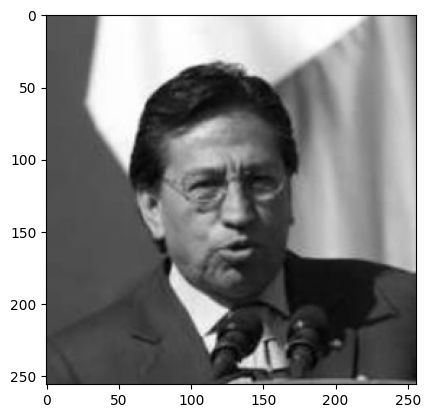

In [150]:
new = test_image
_ = plt.imshow(new, cmap="gray")

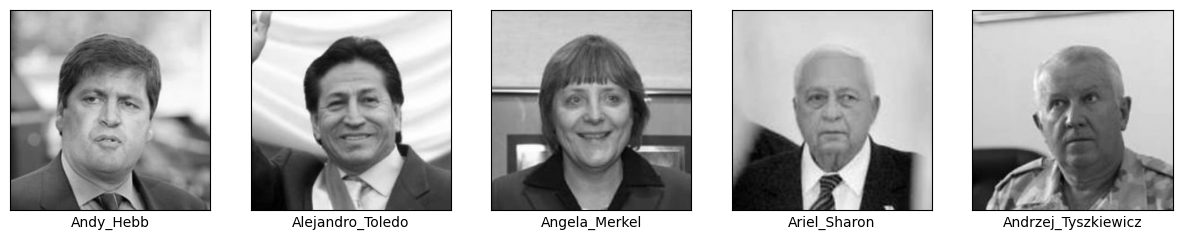

In [151]:
new_v = new.ravel(order="F")
names = sum(map(lambda item: [item[0]] * len(item[1]), images.items()), [])
show_images(M, get_closest_naive(M, new_v, 5), names)

Помимо того, что такой подход может оказаться неприемлемым с точки зрения производительности, он также не устойчив:  например, изменение освещения или фона может очень сильно изменить норму разности.

   2. **(2 балла)** Применим подход, использующий SVD. Именно, спроецируем новое изображение на пространство, задаваемое ортонормированным базисом $U$, и будем сравнивать норму разности проекций. Причём для устойчивости к изменению освещения не будем учитывать первую компоненту в разложении по столбцам матрицы $U$. Напишите функцию `get_closest_proj`, которая возвращает индексы `count` изображений по описанному алгоритму.

In [152]:
def get_closest_proj(U, C, new_v, count):
    """
        Input
            U: orthonormal basis of columns of Mr
            C: coefficients in equality Mr = UC
            new_v: new image as a vector of shape (size**2,)
            count: desired number of closest images

        Output
            indices: list (of len `count`) of indices of closest images
    """
    U_basis = U[:, 1:]
    proj = C[1:, :]
    proj_new_v = U_basis.T @ new_v
    difference = np.linalg.norm(proj - proj_new_v[:, np.newaxis], axis=0)
    indices = sorted(range(len(difference)), key=lambda i: difference[i])[:count]
    return indices

    raise NotImplementedError()

Проверим подход с SVD  том же тестовом изображении. Правильно реализованный метод должен найти как минимум два изображения Алехандро.

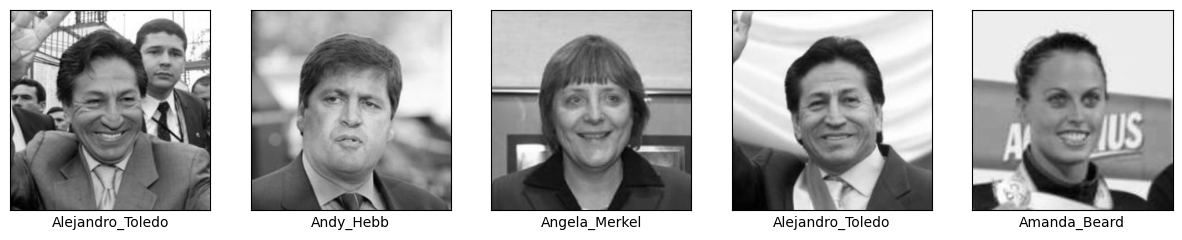

In [153]:
show_images(M, get_closest_proj(U, C, new_v, 5), names)